In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_full = housing.data
y_full = housing.target
feature_names = housing.feature_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_full, test_size=0.2, random_state=42
    )

In [5]:
X = X_train.tolist()
y = y_train.tolist()

In [6]:
#num_samples = 200
X = X[:]
y = y[:]

In [7]:
print(X[0],y[0])

[-0.3216542903733277, 0.34647802955744084, -0.16625886034634157, -0.19045098681609532, 0.7722505017447289, 0.0598084660592724, -1.3679762815342846, 1.2676445067754007] 1.03


In [8]:
from paraeant import EANT

In [9]:
population_size= 10
eant = EANT(population_size=population_size, 
            input_count=len(X[0]),  # 8 features
            output_count=1)  # Single output (housing price)

In [10]:
eant.initialize_minimal_population()

Generated 10 minimal networks


In [11]:
eant.evolve(X,y,generations=10)

Generated 10 minimal networks

==================== Generation 1/10 ====================
Evaluating population...
Best fitness so far: -5.349355

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 2/10 ====================
Evaluating population...
Best fitness so far: -4.706627

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 3/10 ====================
Evaluating population...
Best fitness so far: -4.693056

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different stru

In [12]:
print(eant.best_genome)

V0(arity=4, act=leaky_relu, w=1.18) I(label=i2, w=-0.14) I(label=i5, w=-3.33) I(label=i6, w=0.44) I(label=i4, w=-2.20)


In [13]:
eant.evolve(X,y,50)

Generated 10 minimal networks

==================== Generation 1/50 ====================
Evaluating population...
Best fitness so far: -3.791730

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 2/50 ====================
Evaluating population...
Best fitness so far: -3.375720

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 3/50 ====================
Evaluating population...
Best fitness so far: -2.705200

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different stru

In [14]:
print(eant.best_genome)

V0(arity=3, act=sigmoid, w=4.09) V3(arity=3, act=sigmoid, w=0.24) I(label=i5, w=1.66) I(label=i4, w=1.66) I(label=i6, w=0.72) V1(arity=5, act=leaky_relu, w=-0.43) JF(src=3, w=0.26) V2(arity=2, act=leaky_relu, w=0.10) I(label=i2, w=1.65) I(label=i4, w=1.99) I(label=i2, w=0.32) I(label=i3, w=-1.12) I(label=i0, w=-0.98) I(label=i0, w=0.52)


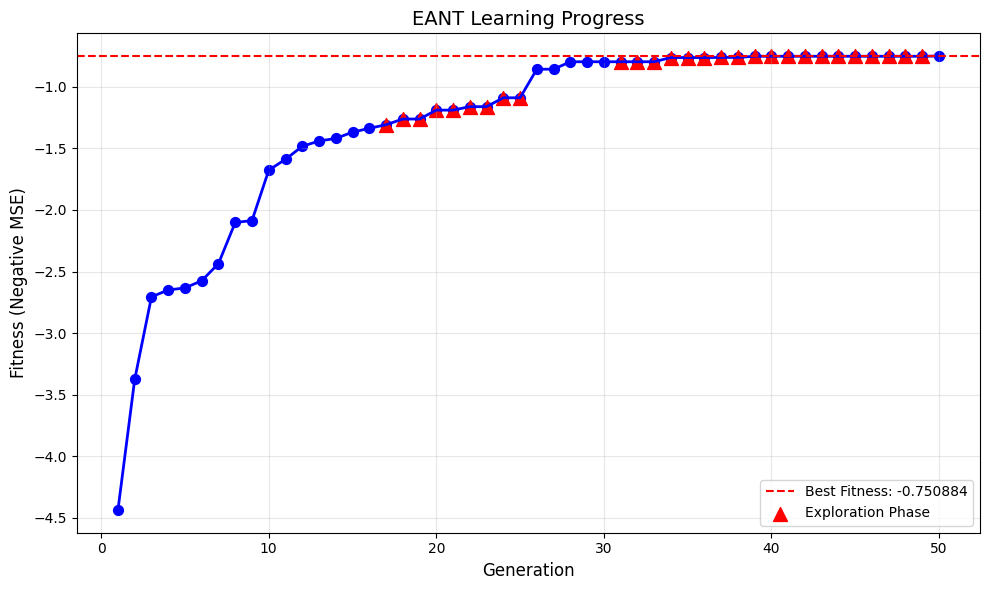

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Extract fitness history data
fitness_history = eant.fitness_history
generations = list(range(1, len(fitness_history) + 1))

# Create the main plot
plt.plot(generations, fitness_history, 'b-', linewidth=2)
plt.scatter(generations, fitness_history, color='blue', s=50)

# Add a horizontal line showing the overall best fitness
best_fitness = eant.best_fitness
plt.axhline(y=best_fitness, color='r', linestyle='--', 
            label=f'Best Fitness: {best_fitness:.6f}')

# Add labels and title
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness (Negative MSE)', fontsize=12)
plt.title('EANT Learning Progress', fontsize=14)
plt.grid(True, alpha=0.3)

# Add exploration/exploitation indicators if available
if len(fitness_history) > eant.buffer_length:
    exploration_gens = []
    for i in range(eant.buffer_length, len(fitness_history)-1):
        current = fitness_history[i]
        previous = fitness_history[i-eant.buffer_length]
        if current - previous < eant.improvement_threshold:
            exploration_gens.append(i+1)  # +1 because generations are 1-indexed
    
    if exploration_gens:
        plt.scatter(exploration_gens, [fitness_history[i-1] for i in exploration_gens], 
                    color='red', s=100, marker='^', label='Exploration Phase')

    # Add legend and show plot
    plt.legend(fontsize=10)
    plt.tight_layout()
